In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\dell\Python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df=pd.read_csv("C:/Users\dell\Downloads\Churn Rate/train.csv")


In [163]:
df.shape

(4250, 20)

In [131]:
#df.churn.value_counts()

In [132]:
#df.nunique()

In [133]:
#df.isnull().sum()

In [5]:
d=dict(df.state.value_counts())

In [6]:
df.state=df.state.map(d) # Frequency encoding the categorical feature
#df.state.head()

In [137]:
#df.head()

In [7]:
obj=df.select_dtypes(include="object").columns
obj

Index(['area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [8]:
df=pd.get_dummies(df,columns=['area_code', 'international_plan', 'voice_mail_plan'],drop_first=True)
df.head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,95,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no,1,0,0,1
1,96,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no,1,0,0,0
2,95,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no,0,0,1,0
3,78,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no,1,0,1,0
4,89,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no,0,1,0,1


In [9]:
df.churn=df.churn.map({"no":0,"yes":1})
df.churn.unique()

array([0, 1], dtype=int64)

In [10]:
df.churn.value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [142]:
df.columns

Index(['state', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'area_code_area_code_415',
       'area_code_area_code_510', 'international_plan_yes',
       'voice_mail_plan_yes'],
      dtype='object')

In [11]:
num=df[['state', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']].copy()
num.head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,95,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,96,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,95,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,78,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,89,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


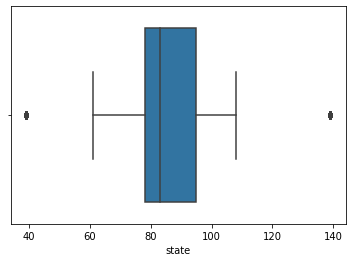

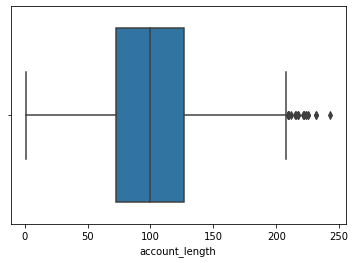

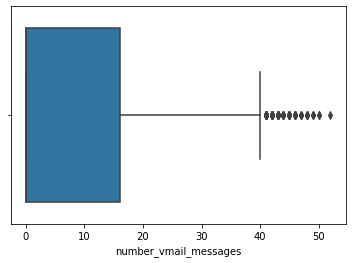

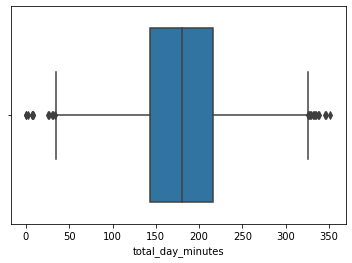

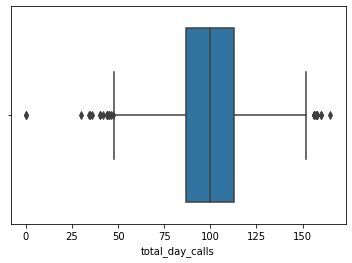

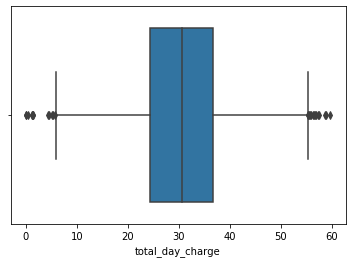

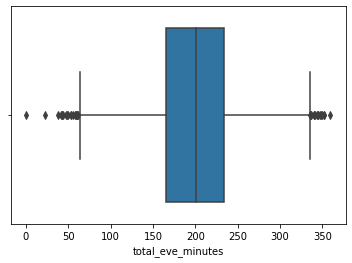

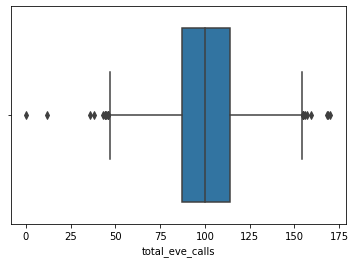

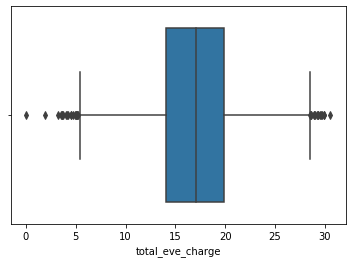

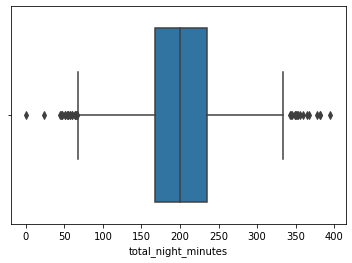

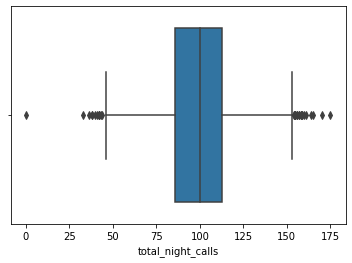

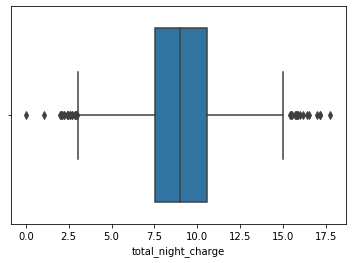

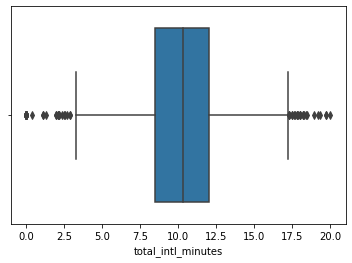

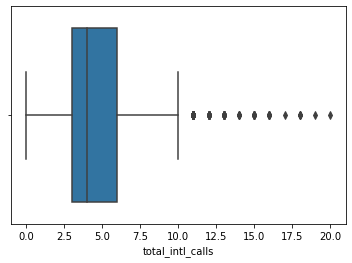

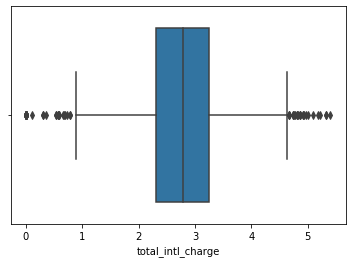

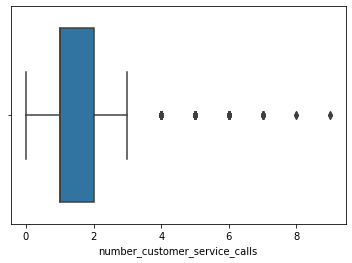

In [144]:
for i in num.columns:
    sns.boxplot(num[i])
    plt.show()

In [12]:
cols=['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge']

In [13]:
df[df.number_customer_service_calls>3]["number_customer_service_calls"].value_counts()

4    209
5     81
6     28
7     13
9      2
8      2
Name: number_customer_service_calls, dtype: int64

In [14]:
df[df.number_customer_service_calls>3]["churn"].value_counts()
# Since the churn is almost similar for calls greater than 3, I will use min-max scalar only for this feature

1    170
0    165
Name: churn, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
cols=['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge']

sc=StandardScaler()
x_sc=sc.fit_transform(df[cols])
x_sc=pd.DataFrame(x_sc,columns=cols)
x_sc

C:\Users\dell\Python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dell\Python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
0,0.170399,1.366857,-0.345510,1.163449,-0.345788,-0.093025,0.141841,-0.092493,1.070003,0.157309,1.070820,1.247901,-0.579164,1.248591
1,0.926186,-0.567911,1.169136,0.710014,1.169295,-1.571820,0.493490,-1.572341,-0.753320,0.207083,-0.752053,0.704379,0.232927,0.698342
2,-0.409038,-0.567911,2.206058,-1.456398,2.206218,-2.752070,-0.611691,-2.752473,-0.072057,-0.539526,-0.072337,-1.324770,1.045017,-1.328187
3,-0.635774,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,1.096316,-1.031447,-0.270676,1.053239,-0.270956,-0.056552,-0.579164,-0.053219
4,0.523099,1.218029,0.702522,-0.599910,0.702027,2.952139,0.393019,2.951497,0.239775,0.903917,0.241038,-0.998657,1.045017,-0.992669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,-0.434231,-0.567911,0.148880,-1.506780,0.148711,0.868291,-0.611691,0.867535,0.261623,-1.037264,0.263106,0.015918,0.638972,0.013885
4246,-0.686160,-0.567911,-0.043691,-0.549528,-0.044078,-1.372790,-0.913104,-1.373311,-0.284579,-0.539526,-0.284197,0.450735,0.638972,0.456769
4247,-0.635774,-0.567911,-0.177010,0.055052,-0.176961,-0.140792,1.297257,-0.141665,-1.418694,0.207083,-1.418526,-1.216066,1.045017,-1.220821
4248,-1.265596,2.408655,1.026560,1.364976,1.026609,0.454308,1.297257,0.455425,1.926052,0.804369,1.927084,-0.129022,0.232927,-0.133743


In [123]:
#min_max scaling
x_mn=(df["number_customer_service_calls"]-max(df["number_customer_service_calls"]))/(max(df["number_customer_service_calls"])-min(df["number_customer_service_calls"]))

In [16]:
mn=MinMaxScaler()
x_mn=mn.fit_transform(df[["state","number_customer_service_calls"]])
x_mn=pd.DataFrame(x_mn,columns=["state","number_customer_service_calls"])

In [17]:
x_scaled=pd.concat([x_sc,x_mn],axis=1)
x_scaled

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,state,number_customer_service_calls
0,0.170399,1.366857,-0.345510,1.163449,-0.345788,-0.093025,0.141841,-0.092493,1.070003,0.157309,1.070820,1.247901,-0.579164,1.248591,0.56,0.111111
1,0.926186,-0.567911,1.169136,0.710014,1.169295,-1.571820,0.493490,-1.572341,-0.753320,0.207083,-0.752053,0.704379,0.232927,0.698342,0.57,0.000000
2,-0.409038,-0.567911,2.206058,-1.456398,2.206218,-2.752070,-0.611691,-2.752473,-0.072057,-0.539526,-0.072337,-1.324770,1.045017,-1.328187,0.56,0.222222
3,-0.635774,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,1.096316,-1.031447,-0.270676,1.053239,-0.270956,-0.056552,-0.579164,-0.053219,0.39,0.333333
4,0.523099,1.218029,0.702522,-0.599910,0.702027,2.952139,0.393019,2.951497,0.239775,0.903917,0.241038,-0.998657,1.045017,-0.992669,0.50,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,-0.434231,-0.567911,0.148880,-1.506780,0.148711,0.868291,-0.611691,0.867535,0.261623,-1.037264,0.263106,0.015918,0.638972,0.013885,0.41,0.000000
4246,-0.686160,-0.567911,-0.043691,-0.549528,-0.044078,-1.372790,-0.913104,-1.373311,-0.284579,-0.539526,-0.284197,0.450735,0.638972,0.456769,1.00,0.333333
4247,-0.635774,-0.567911,-0.177010,0.055052,-0.176961,-0.140792,1.297257,-0.141665,-1.418694,0.207083,-1.418526,-1.216066,1.045017,-1.220821,0.41,0.111111
4248,-1.265596,2.408655,1.026560,1.364976,1.026609,0.454308,1.297257,0.455425,1.926052,0.804369,1.927084,-0.129022,0.232927,-0.133743,0.38,0.222222


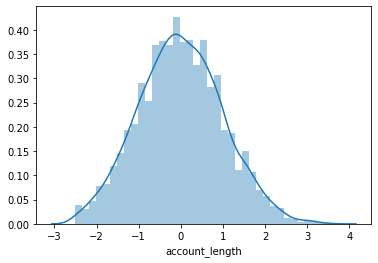

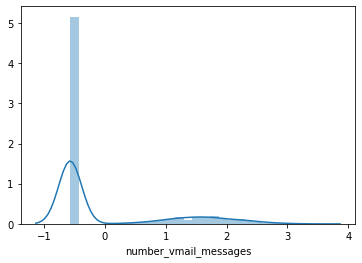

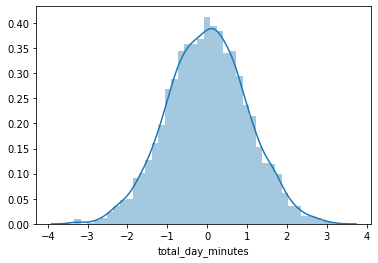

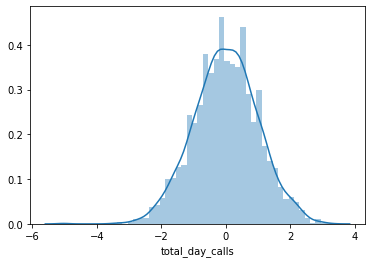

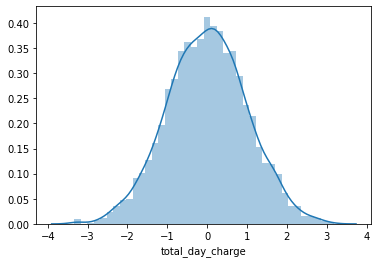

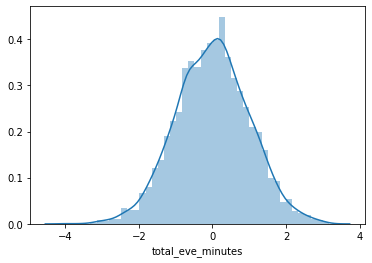

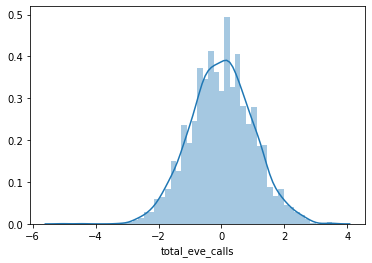

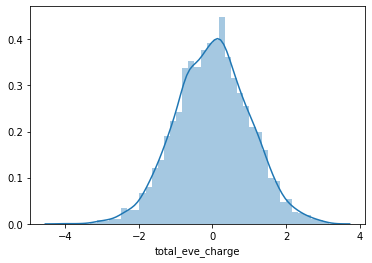

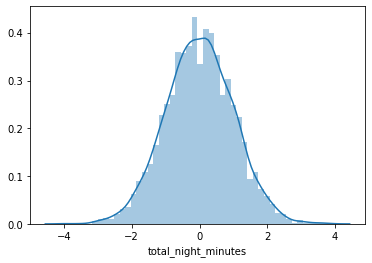

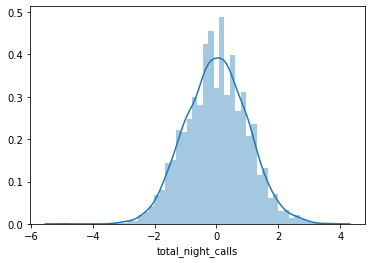

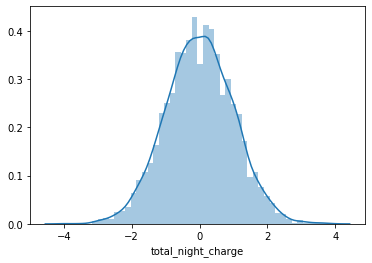

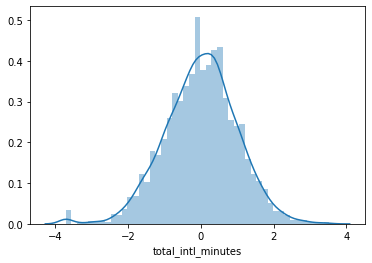

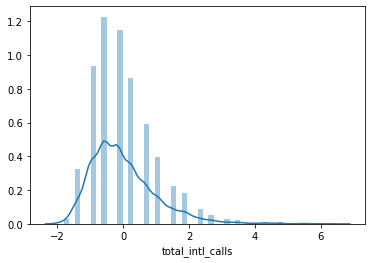

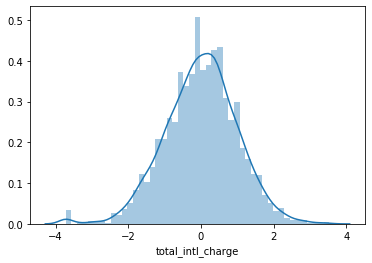

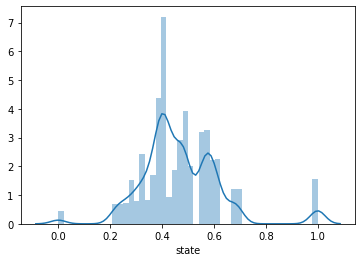

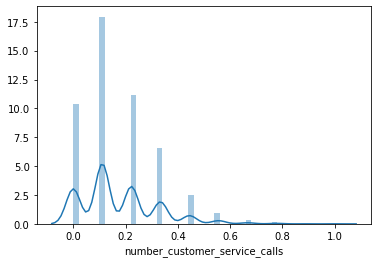

In [153]:
for i in x_scaled.columns:
    sns.distplot(x_scaled[i])
    plt.show()

In [18]:
# Imputing the outliers


for i in x_scaled.columns:
    q1=x_scaled[i].quantile(0.25)
    q3=x_scaled[i].quantile(0.75)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    x_scaled.loc[x_scaled[i]<ll,i]=x_scaled[i].quantile(0.05)
    x_scaled.loc[x_scaled[i]>ul,i]=x_scaled[i].quantile(0.99)

In [19]:
x_final=pd.concat((x_scaled,df[['area_code_area_code_415',
       'area_code_area_code_510', 'international_plan_yes',
       'voice_mail_plan_yes']]),1)
x_final.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,state,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,0.170399,1.366857,-0.345510,1.163449,-0.345788,-0.093025,0.141841,-0.092493,1.070003,0.157309,1.070820,1.247901,-0.579164,1.248591,0.56,0.111111,1,0,0,1
1,0.926186,-0.567911,1.169136,0.710014,1.169295,-1.571820,0.493490,-1.572341,-0.753320,0.207083,-0.752053,0.704379,0.232927,0.698342,0.57,0.000000,1,0,0,0
2,-0.409038,-0.567911,2.206058,-1.456398,2.206218,-1.631529,-0.611691,-1.630879,-0.072057,-0.539526,-0.072337,-1.324770,1.045017,-1.328187,0.56,0.222222,0,0,1,0
3,-0.635774,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,1.096316,-1.031447,-0.270676,1.053239,-0.270956,-0.056552,-0.579164,-0.053219,0.39,0.333333,1,0,1,0
4,0.523099,1.218029,0.702522,-0.599910,0.702027,2.358053,0.393019,2.357943,0.239775,0.903917,0.241038,-0.998657,1.045017,-0.992669,0.50,0.333333,0,1,0,1


In [20]:
y=df.churn
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold,StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,f1_score,recall_score,precision_score

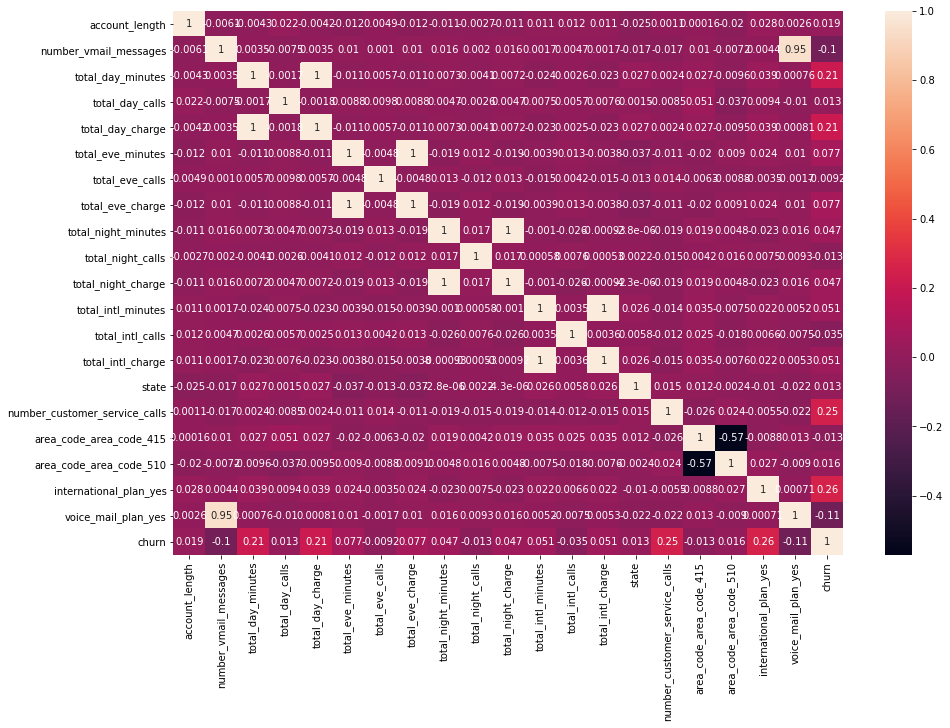

In [21]:
df_final=pd.concat([x_final,y],1)
plt.figure(figsize=(15,10))
sns.heatmap(df_final.corr(),annot=True)
plt.show()

In [44]:
# conda install statsmodels

In [22]:
df_final.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'state',
       'number_customer_service_calls', 'area_code_area_code_415',
       'area_code_area_code_510', 'international_plan_yes',
       'voice_mail_plan_yes', 'churn'],
      dtype='object')

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data=df_final[['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'state',
       'number_customer_service_calls']].copy()
vif=pd.DataFrame()
vif["features"]=data.columns
vif["values"]=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [32]:
vif.sort_values("values",ascending=False)

,features,values
7,total_eve_charge,2.117734e+06
5,total_eve_minutes,2.117731e+06
8,total_night_minutes,6.027347e+05
10,total_night_charge,6.027337e+05
11,total_intl_minutes,6.174512e+04
13,total_intl_charge,6.174505e+04
2,total_day_minutes,2.832125e+04
4,total_day_charge,2.832119e+04
14,state,1.952428e+00
15,number_customer_service_calls,1.951855e+00


In [45]:
while True:   
    vif=pd.DataFrame()
    vif["features"]=data.columns
    vif["values"]=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
    sorted_vif=vif.sort_values("values",ascending=False)
    sorted_vif.set_index("features",inplace=True)

    if max(sorted_vif.values>15):
        data.drop(sorted_vif.idxmax(),1,inplace=True)
    else:
        break
print(sorted_vif.index)


Index(['state', 'number_customer_service_calls', 'total_night_charge',
       'total_intl_charge', 'total_intl_calls', 'account_length',
       'total_eve_minutes', 'total_eve_calls', 'total_day_calls',
       'total_day_charge', 'total_night_calls', 'number_vmail_messages'],
      dtype='object', name='features')


In [46]:
df_final_2=pd.concat([df_final[['state', 'number_customer_service_calls', 'total_night_charge',
       'total_intl_charge', 'total_intl_calls', 'account_length',
       'total_eve_minutes', 'total_eve_calls', 'total_day_calls',
       'total_day_charge', 'total_night_calls', 'number_vmail_messages']],df_final.churn],1)

In [48]:
df_final_2.shape

(4250, 13)

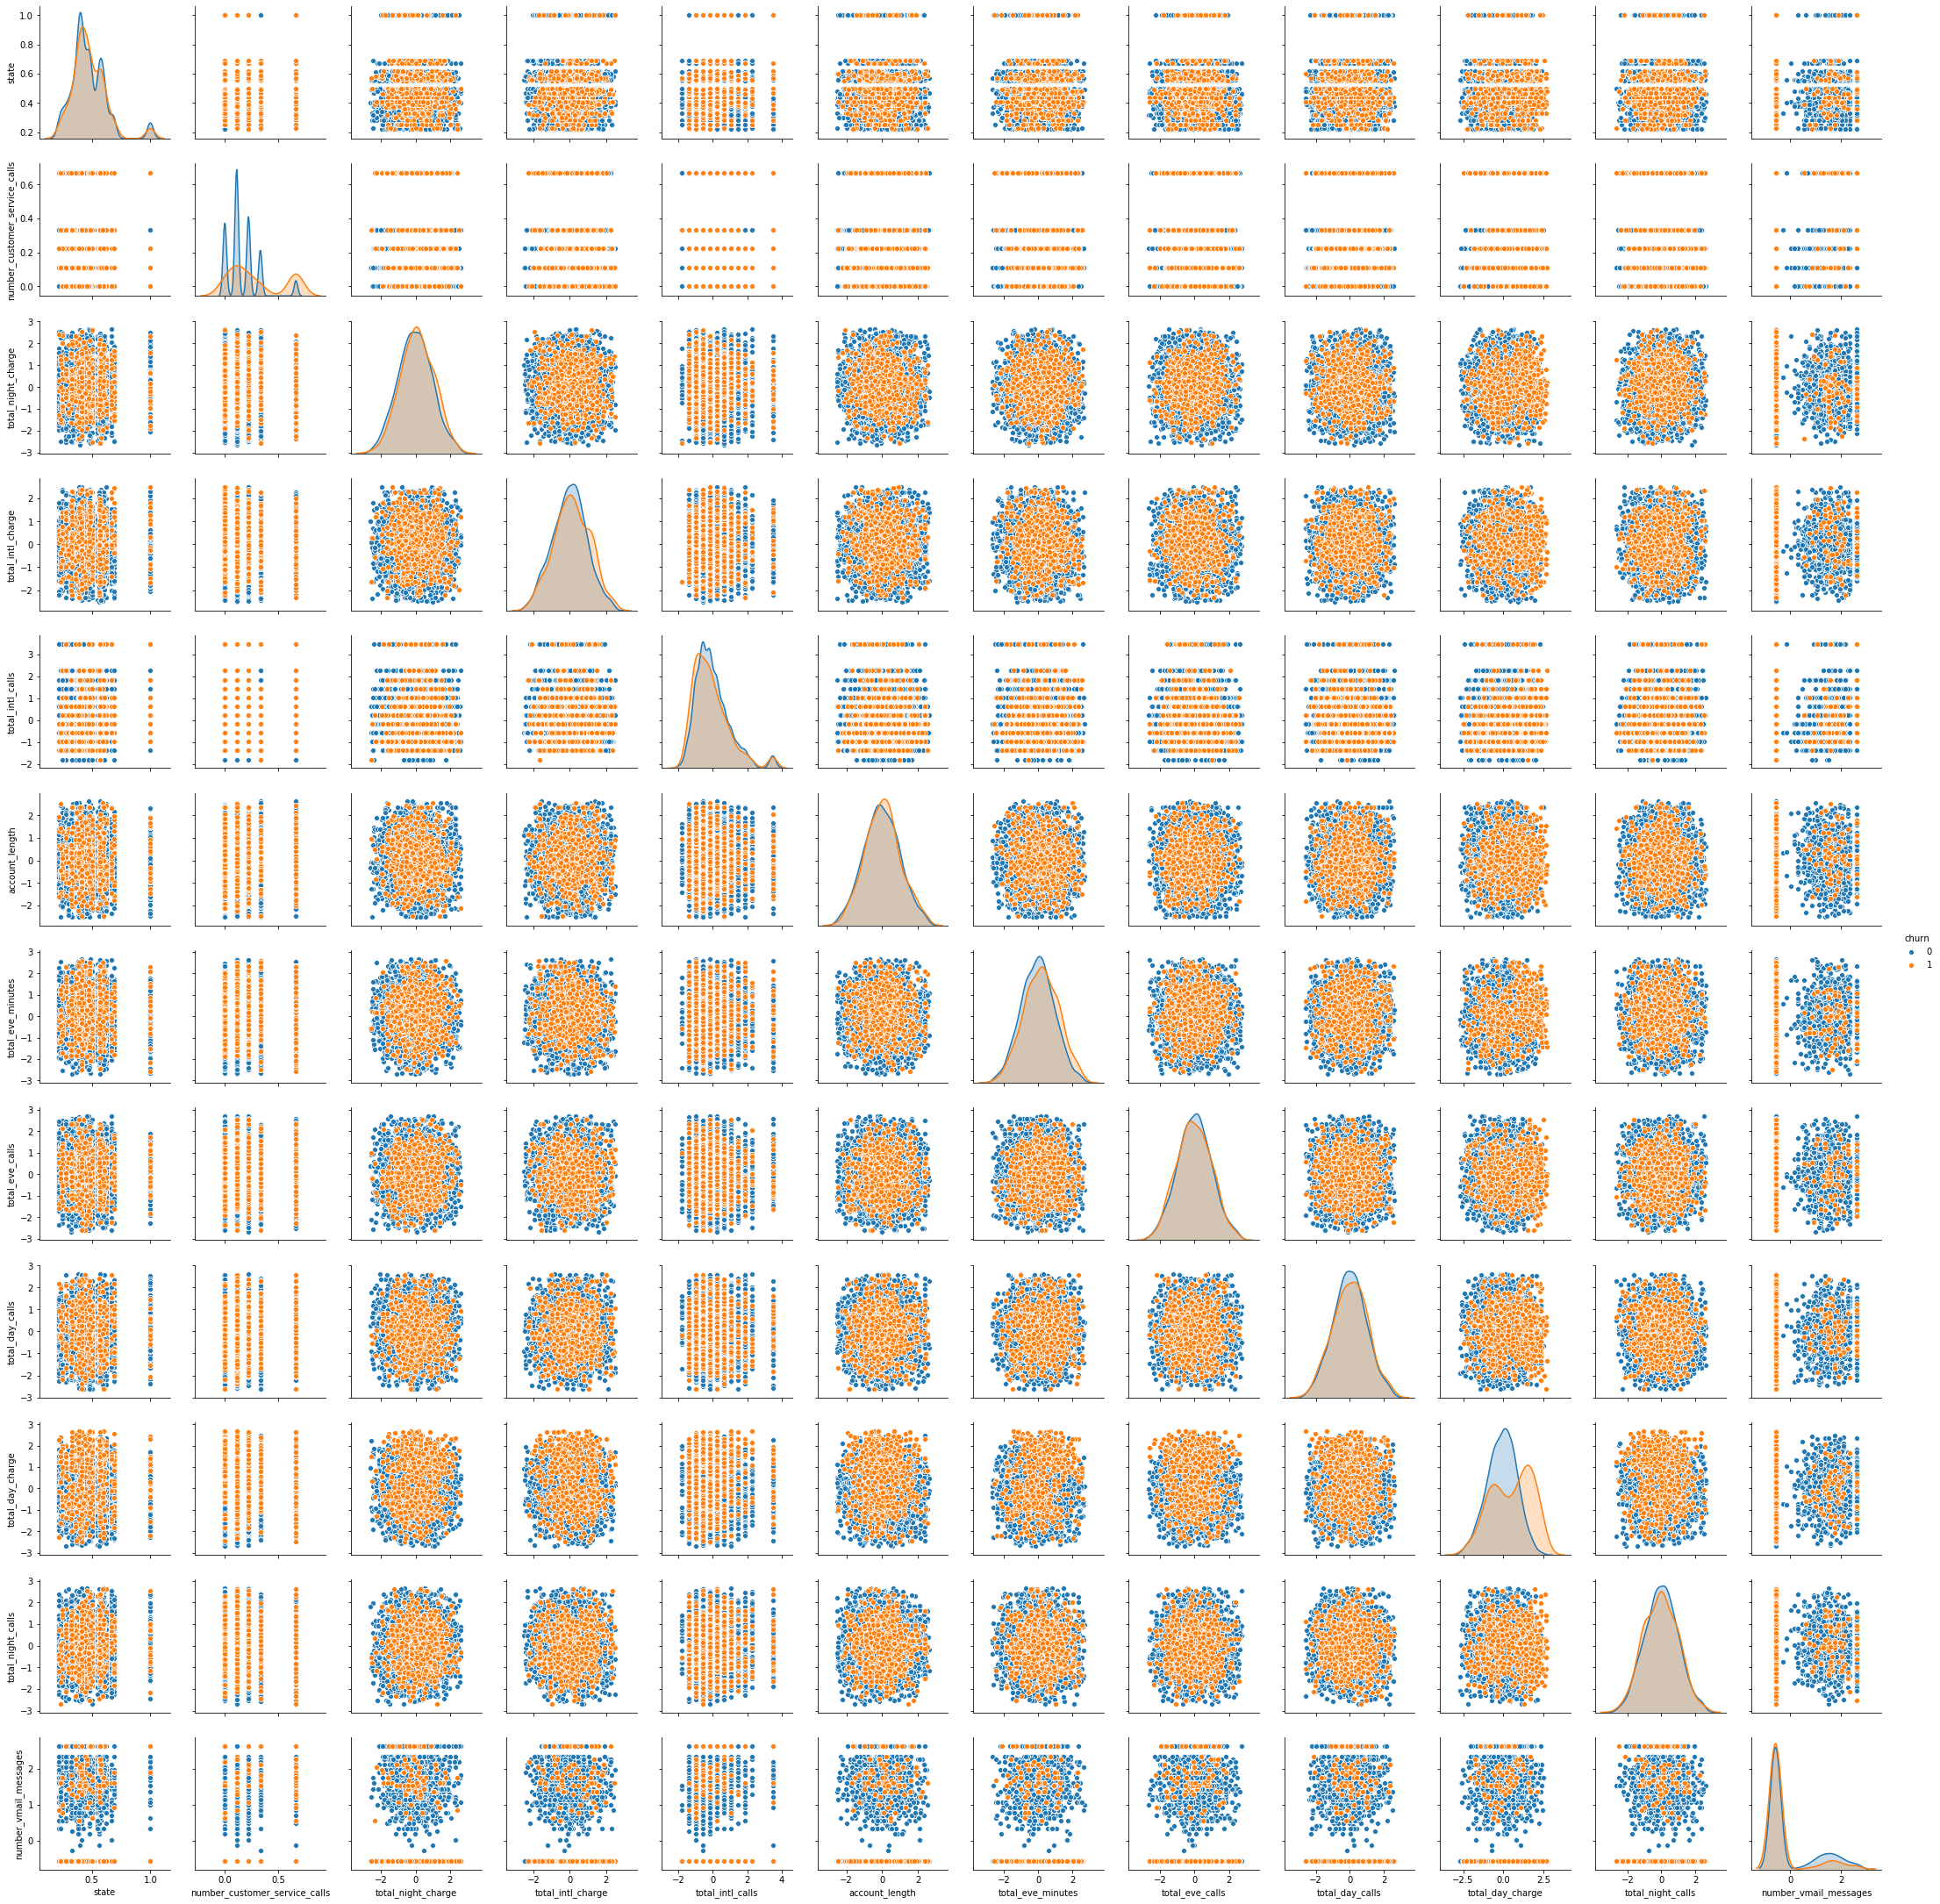

In [51]:
sns.pairplot(df_final_2,hue="churn")
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()

kfold=StratifiedKFold(n_splits=4)

params={"n_estimators":(2,250),"criterion":["gini","entropy"]}

x=df_final_2.drop("churn",1)
y=df_final_2.churn



In [54]:
grid=GridSearchCV(RF,param_grid=params,cv=kfold,scoring="f1")

grid.fit(x,y)

grid.best_params_

{'criterion': 'entropy', 'n_estimators': 250}

In [55]:
grid.best_score_

0.6844107518727477

In [56]:
params={"n_estimators":(250,450),"criterion":["gini","entropy"]}
grid=GridSearchCV(RF,param_grid=params,cv=kfold,scoring="f1")

grid.fit(x,y)

grid.best_params_

{'criterion': 'entropy', 'n_estimators': 450}

In [57]:
grid.best_score_

0.6830506171971447

In [60]:
params={"n_estimators":(750,1000),"criterion":["gini","entropy"]}
grid=GridSearchCV(RF,param_grid=params,cv=kfold,scoring="f1")

grid.fit(x,y)

grid.best_params_

{'criterion': 'gini', 'n_estimators': 750}

In [61]:
grid.best_score_

0.6787597914494506

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

GB=GradientBoostingClassifier()

grid=GridSearchCV(GB,param_grid={"n_estimators":np.arange(1,500)},cv=kfold,scoring="f1")

grid.fit(x,y)

grid.best_params_

{'n_estimators': 393}

In [63]:
grid.best_score_

0.6842790256297644

In [66]:
from sklearn.ensemble import AdaBoostClassifier

rf=RandomForestClassifier(n_estimators=250,criterion="entropy")

ADB=AdaBoostClassifier(base_estimator=rf)

grid=GridSearchCV(ADB,param_grid={"n_estimators":np.arange(2,250)},cv=kfold,scoring="f1")

grid.fit(x,y)

grid.best_params_

{'n_estimators': 20}

In [67]:
grid.best_score_

0.6899500633721279

In [69]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.25)

for train_ind,test_ind in sss.split(x,y):
    train=train_ind
    test=test_ind

### BEST MODEL

In [95]:
rf=RandomForestClassifier(n_estimators=250,criterion="entropy")


AdaBoost=AdaBoostClassifier(rf,n_estimators=20)

AdaBoostmodel=AdaBoost.fit(x.iloc[train_ind],y.iloc[train_ind])

ypred=AdaBoostmodel.predict(x.iloc[test_ind])

print("F1_score is : ",f1_score(y.iloc[test_ind],ypred))

print("recall is : ",recall_score(y.iloc[test_ind],ypred))

print("precision is : ",precision_score(y.iloc[test_ind],ypred))

print("accuracy is : ",accuracy_score(y.iloc[test_ind],ypred))

print(classification_report(y.iloc[test_ind],ypred))



F1_score is :  0.6608695652173914
recall is :  0.5066666666666667
precision is :  0.95
accuracy is :  0.9266227657572906
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       913
           1       0.95      0.51      0.66       150

    accuracy                           0.93      1063
   macro avg       0.94      0.75      0.81      1063
weighted avg       0.93      0.93      0.92      1063



In [100]:
yscore=AdaBoostmodel.predict_proba(x.iloc[test_ind])

print(roc_auc_score(y.iloc[test_ind],yscore[:,1]))

0.8400803212851405


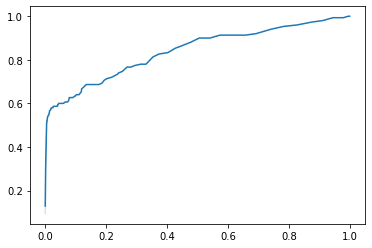

In [113]:
fpr,tpr,thres=roc_curve(y.iloc[test_ind],yscore[:,1])

sns.lineplot(fpr,tpr)

In [85]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()

kfold=StratifiedKFold(n_splits=4)

params={"n_estimators":(2,350),"criterion":["gini","entropy"]}

x=df_final_2.drop("churn",1)
y=df_final_2.churn

grid=GridSearchCV(RF,param_grid=params,cv=kfold,scoring="recall")

grid.fit(x,y)

grid.best_params_


{'criterion': 'gini', 'n_estimators': 350}

In [87]:
grid.best_score_

0.526744966442953

In [88]:
params={"n_estimators":(350,750),"criterion":["gini","entropy"]}

grid=GridSearchCV(RF,param_grid=params,cv=kfold,scoring="recall")

grid.fit(x,y)

grid.best_params_


{'criterion': 'gini', 'n_estimators': 750}

In [89]:
grid.best_score_

0.5367897091722595

In [90]:
params={"n_estimators":(750,1050),"criterion":["gini","entropy"]}

grid=GridSearchCV(RF,param_grid=params,cv=kfold,scoring="recall")

grid.fit(x,y)

grid.best_params_


{'criterion': 'entropy', 'n_estimators': 750}

In [91]:
grid.best_score_

0.5351006711409396

In [93]:
rf=RandomForestClassifier(n_estimators=750,criterion="gini")

ADB=AdaBoostClassifier(base_estimator=rf)

grid=GridSearchCV(ADB,param_grid={"n_estimators":np.arange(2,250)},cv=kfold,scoring="recall")

grid.fit(x,y)

grid.best_params_

{'n_estimators': 84}

In [94]:
rf=RandomForestClassifier(n_estimators=750,criterion="gini")

AdaBoost=AdaBoostClassifier(rf,n_estimators=84)

AdaBoostmodel=AdaBoost.fit(x.iloc[train_ind],y.iloc[train_ind])

ypred=AdaBoostmodel.predict(x.iloc[test_ind])

print("F1_score is : ",f1_score(y.iloc[test_ind],ypred))

print("recall is : ",recall_score(y.iloc[test_ind],ypred))

print("precision is : ",precision_score(y.iloc[test_ind],ypred))

print("accuracy is : ",accuracy_score(y.iloc[test_ind],ypred))

print(classification_report(y.iloc[test_ind],ypred))

F1_score is :  0.6343612334801763
recall is :  0.48
precision is :  0.935064935064935
accuracy is :  0.9219190968955786
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       913
           1       0.94      0.48      0.63       150

    accuracy                           0.92      1063
   macro avg       0.93      0.74      0.80      1063
weighted avg       0.92      0.92      0.91      1063



### EVALUATING THE MODEL ON ACCURACY

In [114]:
RF=RandomForestClassifier()

kfold=StratifiedKFold(n_splits=4)

params={"n_estimators":(2,350),"criterion":["gini","entropy"]}

x=df_final_2.drop("churn",1)
y=df_final_2.churn

grid=GridSearchCV(RF,param_grid=params,cv=kfold,scoring="accuracy")

grid.fit(x,y)

grid.best_params_


{'criterion': 'entropy', 'n_estimators': 350}

In [115]:
grid.best_score_

0.9287068631046341

In [117]:
RF=RandomForestClassifier()

kfold=StratifiedKFold(n_splits=4)

params={"n_estimators":(350,950),"criterion":["gini","entropy"]}

x=df_final_2.drop("churn",1)
y=df_final_2.churn

grid=GridSearchCV(RF,param_grid=params,cv=kfold,scoring="accuracy")

grid.fit(x,y)

grid.best_params_


{'criterion': 'entropy', 'n_estimators': 950}

In [118]:
grid.best_score_

0.9296484826903214

In [119]:
RF=RandomForestClassifier()

kfold=StratifiedKFold(n_splits=4)

params={"n_estimators":(950,1200),"criterion":["gini","entropy"]}

x=df_final_2.drop("churn",1)
y=df_final_2.churn

grid=GridSearchCV(RF,param_grid=params,cv=kfold,scoring="accuracy")

grid.fit(x,y)

grid.best_params_


{'criterion': 'entropy', 'n_estimators': 950}

In [120]:
grid.best_score_

0.9277659078789553

In [122]:
rf=RandomForestClassifier(n_estimators=100,criterion="entropy")

ADB=AdaBoostClassifier(base_estimator=rf)

grid=GridSearchCV(ADB,param_grid={"n_estimators":np.arange(2,100)},cv=kfold,scoring="accuracy")

grid.fit(x,y)

grid.best_params_

{'n_estimators': 85}

In [123]:
rf=RandomForestClassifier(n_estimators=100,criterion="entropy")

AdaBoost=AdaBoostClassifier(rf,n_estimators=85)

AdaBoostmodel=AdaBoost.fit(x.iloc[train_ind],y.iloc[train_ind])

ypred=AdaBoostmodel.predict(x.iloc[test_ind])

print("F1_score is : ",f1_score(y.iloc[test_ind],ypred))

print("recall is : ",recall_score(y.iloc[test_ind],ypred))

print("precision is : ",precision_score(y.iloc[test_ind],ypred))

print("accuracy is : ",accuracy_score(y.iloc[test_ind],ypred))

print(classification_report(y.iloc[test_ind],ypred))

F1_score is :  0.6000000000000001
recall is :  0.44
precision is :  0.9428571428571428
accuracy is :  0.9172154280338665
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       913
           1       0.94      0.44      0.60       150

    accuracy                           0.92      1063
   macro avg       0.93      0.72      0.78      1063
weighted avg       0.92      0.92      0.90      1063



In [124]:
from sklearn.ensemble import GradientBoostingClassifier

GB=GradientBoostingClassifier()

grid=GridSearchCV(GB,param_grid={"n_estimators":np.arange(1,500)},cv=kfold,scoring="accuracy")

grid.fit(x,y)

grid.best_params_

{'n_estimators': 110}

In [125]:
GB=GradientBoostingClassifier(n_estimators=110)

GBmodel=GB.fit(x.iloc[train_ind],y.iloc[train_ind])

ypred=GBmodel.predict(x.iloc[test_ind])

print("F1_score is : ",f1_score(y.iloc[test_ind],ypred))

print("recall is : ",recall_score(y.iloc[test_ind],ypred))

print("precision is : ",precision_score(y.iloc[test_ind],ypred))

print("accuracy is : ",accuracy_score(y.iloc[test_ind],ypred))

print(classification_report(y.iloc[test_ind],ypred))

F1_score is :  0.6293103448275862
recall is :  0.4866666666666667
precision is :  0.8902439024390244
accuracy is :  0.9190968955785512
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       913
           1       0.89      0.49      0.63       150

    accuracy                           0.92      1063
   macro avg       0.91      0.74      0.79      1063
weighted avg       0.92      0.92      0.91      1063

